<a href="https://colab.research.google.com/github/raphamonn/Decision-Tree-with-PokemonData/blob/main/Classifica%C3%A7%C3%A3o%20de%20Pokemons%20Lend%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELO DE CLASSIFICAÇÃO DE POKÉMONS LENDÁRIOS COM BASE EM SUAS FEATURES**

# DESCRIÇÃO DO PROBLEMA E OBJETIVOS
### PROBLEMA
Dado um pokémon, é possível classificá-lo como lendário ou não lendário com base em suas características? É possível fazê-lo por meio de algoritmos de classificação?

### OBJETIVOS
* Criar um modelo de **classificação** que consiga predizer se um pokémon é lendário ou não tendo como base suas features, por exemplo, cor, tamanho, peso, raridade (catch_rate), entre outras.

 * Em um primeiro momento considerando majoritariamente todas as features, com exceção das que foram removidas durante o pré-processamento, por possuírem muitos dados NULL.

* Exibir uma matriz de correlação e verificar quais são as melhores features pra levar em consideração na hora de classificar o pokémon.

* Avaliar a eficácia do modelo conforme acurácia e outras métricas. No modelo Decision Tree, verificar quais foram as features mais importantes para a formação da árvore (exibindo-a), e verificar quais foram os erros individuais do algoritmo.

* Comparar as pontuações do primeiro algoritmo, Decision Tree, sem PCA, com um novo modelo de Decision Tree com PCA, para que seja possível avaliar a viabilidade da redução de dimensionalidade nos dados.

* Exibir as figuras com os dados de treino através do PCA, a fim de entender o quão possível seria separar os dados com apenas duas features/dimensões.

# BANCOS DE DADOS UTILIZADO

Pokémon for Data Mining and Machine Learning, por **Asier López Zorrilla**:

https://www.kaggle.com/datasets/alopez247/pokemon

# DESCRIÇÃO DO BANCO DE DADOS

* O banco de dados utilizado é baseado na franquia de RPG Pokémon, originalmente criado em 1996, com versões sendo lançadas até os dias de hoje. O dataset possui todos os pokémons da primeira à sexta geração, totalizando 721 pokémons, sendo que, conforme a feature utilizada que define se o pokemon é lendário ou não, a divisão de classes é de 46 lendários e 675 não lendários, o que torna as classes desbalanceadas. É quase como se este fosse um problema de detecção de anomalias de tráfego de rede em uma escala muito reduzida. A princípio, o dataset possui 21 features, entre elas, cor, tipo primário, secundário, peso, tamanho etc.

 *  Nota: o plural de pokémon aqui fora considerado como "pokémons" para maior clareza, apesar de grande parte da base de fãs da franquia considerar o plural como "pokémon".
  




# TIPO DE MODELO

* Classificação.
 * Decision Tree.
 * Decision Tree com PCA e Cross Validation.

# FERRAMENTAS UTILIZADAS PARA O DATASET ESCOLHIDO

* Decision Tree Classifier. 
* PCA.
* StandardScaler.
* Cross-Validation (Cross_Val_score).

# PRÉ-PROCESSAMENTO DE DADOS

In [ ]:
#Acesso aos documentos do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Pré-processamento de dados.
import pandas as pd
import numpy as np

#Exibição dos dados.
import seaborn as sns
import matplotlib.pyplot as plt

#Medição de tempo.
import time 

#Visualizar o Grafo da Decision Tree.
!pip install graphviz 

# Talvez seja necessário utilizar no CMD do Windows.
!conda install python-graphviz #No jupyter é possível substituir conda por pip.


# Módulos do SKlearn.
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

%matplotlib inline

#Leitura do csv com os pokémons.
pokemon = pd.read_csv('/content/drive/MyDrive/pokemon_alopez247.csv')
#pokemon = pd.read_csv('./pokemon_alopez247.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


In [ ]:
print(pokemon.shape)
pokemon.head()

(721, 23)


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [ ]:
#Análise de quais dados são NULL.
pokemon.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

Tratamento dos dados null.

In [ ]:
#Preenchendo os campos nulos de Pr_Male com 0,5 para pokémons que possuem a feature "hasGender" = False.
pokemon['Pr_Male'] = pokemon['Pr_Male'].fillna(0.5) 
pokemon= pokemon.drop(['Egg_Group_2', 'Type_2'], axis=1)

pokemon.isnull().sum()

Number              0
Name                0
Type_1              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

Sem dados null é possível prosseguir com o pré-processamento.

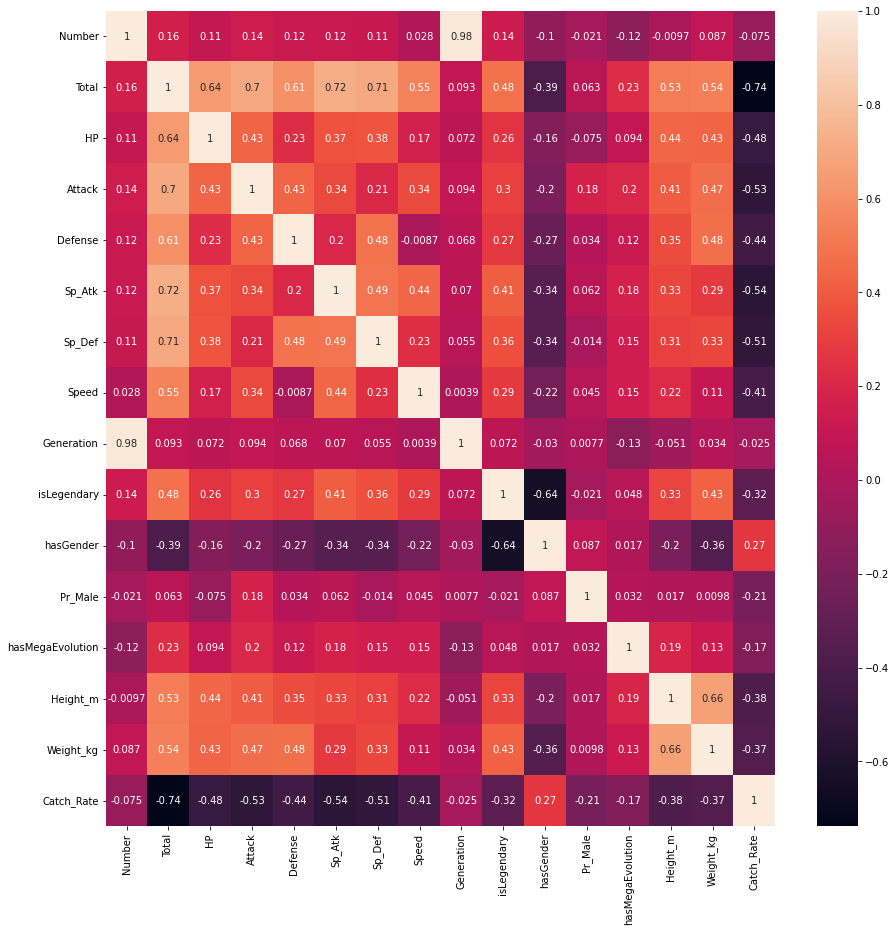

In [ ]:
#Imprimindo a matriz que mostra a correlação entre as features.
plt.figure(figsize=(15,15))
dataplot=sns.heatmap(pokemon.corr(), annot=True)

Imprimindo a matriz de correlação entre os dados numéricos e booleanos do dataset, foi possível extrair algumas informações interessantes, que têm um sentido intuitivo. Por exemplo, há uma enorme correlação entre o número do Pokémon e sua geração, o que é esperado, já que a cada geração são lançados x pokemóns; outro dado interessante é que há uma correlação negativa, porém considerável entre os atributos "isLegendary" e "Catch_Rate", o que é coerente, já que Pokemón lendários são raros.



In [ ]:
#Extraindo somente os dados de correlação relacionados à ser ou não lendário.
corr= pokemon.corr()
corr=(corr[['isLegendary']]).abs()
corr.head()

,isLegendary
Number,0.135022
Total,0.481837
HP,0.258926
Attack,0.302786
Defense,0.274446


A tabela acima apresenta as features correlacionadas com a feature isLegendary, de forma que seria possível realizar a exclusão de features menos relevantes. Optou-se por mantê-las para avaliação dos resultados.

In [ ]:
#Imprimindo o shape e as informações do banco de dados.
print(pokemon.shape)
pokemon.info()

(721, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Total             721 non-null    int64  
 4   HP                721 non-null    int64  
 5   Attack            721 non-null    int64  
 6   Defense           721 non-null    int64  
 7   Sp_Atk            721 non-null    int64  
 8   Sp_Def            721 non-null    int64  
 9   Speed             721 non-null    int64  
 10  Generation        721 non-null    int64  
 11  isLegendary       721 non-null    bool   
 12  Color             721 non-null    object 
 13  hasGender         721 non-null    bool   
 14  Pr_Male           721 non-null    float64
 15  Egg_Group_1       721 non-null    object 
 16  hasMegaEvolution  721 non-null    

Após lidar com os dados null, é necessário transformar os dados categóricos restantes, representados como "object", em dados que possam ser lidos pelo algoritmo. Sendo assim, estes serão transformados ou em booleanos ou entradas numéricas. Os dados que possuem essa categoria são: **Type_1, Name, Egg_Group, Body_Style e Color**, conforme explicitado na tabela acima. Iniciando por **Type_1**:

In [ ]:
#Contagem de quantas entradas tem em cada tipo de pokémon.
print("Antes da mescla")
print("____________")
display((pokemon['Type_1'].value_counts()))

#Conversão para reduzir os tipos de pokémon tratados.
pokemon = pokemon.replace(['Water','Ice'], 'Water')
pokemon = pokemon.replace(['Grass','Bug','Poison'], 'Grass')
pokemon = pokemon.replace(['Psychic','Dark','Ghost'], 'Dark')
pokemon = pokemon.replace(['Electric','Steel'], 'Electric')
pokemon = pokemon.replace(['Rock','Ground'], 'Rock')

print("____________")
print("Após a mescla")
display((pokemon['Type_1'].value_counts()))


Antes da mescla
____________


Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

____________
Após a mescla


Grass       157
Water       128
Dark         98
Normal       93
Rock         71
Electric     58
Fire         47
Fighting     25
Dragon       24
Fairy        17
Flying        3
Name: Type_1, dtype: int64

Feito isso, cada tipo será transformado em uma nova feature, ou seja, a feature que era categórica agora será dividida em onze novas features, assim, pode-se remover a antiga coluna **Type_1**.

In [ ]:
#Gerando um novo dataframe com cada feature sendo um dos onze tipos.
Poke_Type = pd.get_dummies(pokemon['Type_1'])

#Novo dataframe com as novas features.
Poke = pd.concat([pokemon,Poke_Type], axis=1)

#Removendo a antiga feature (que informava o tipo do pokémon).
Poke = Poke.drop(['Type_1'], axis=1)

#Visualizando shape.
print(Poke_Type.shape)
print(Poke.shape)

#Visualizando os dados.
Poke.head()

(721, 11)
(721, 31)


,Number,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Dragon,Electric,Fairy,Fighting,Fire,Flying,Grass,Normal,Rock,Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,0,0,0,0,0,0,1,0,0,0
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,0,0,0,0,0,0,1,0,0,0
2,3,Venusaur,525,80,82,83,100,100,80,1,...,0,0,0,0,0,0,1,0,0,0
3,4,Charmander,309,39,52,43,60,50,65,1,...,0,0,0,0,1,0,0,0,0,0
4,5,Charmeleon,405,58,64,58,80,65,80,1,...,0,0,0,0,1,0,0,0,0,0


A feature **Names** será removida dado que o algoritmo lida com dados numéricos, porém preservada para que seja possível utiizá-la posteriormente para identificar os pokémons que foram classificados incorretamente no final do algoritmo.

In [ ]:
Poke_names = Poke[['Name']].copy()
Poke = Poke.drop(['Name'], axis=1)
print(Poke.shape)
Poke_names.head()

(721, 30)


,Name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon


Feito isso, o processo será repetido para a feature **Egg_Group_1**.

In [ ]:
#Contagem de quantas entradas tem em cada tipo de ovo de pokémon.
print("____________")
display((Poke['Egg_Group_1'].value_counts()))

____________


Field           169
Grass            93
Monster          74
Water_1          74
Undiscovered     73
Mineral          46
Flying           44
Amorphous        41
Human-Like       37
Fairy            30
Water_2          15
Water_3          14
Dragon           10
Ditto             1
Name: Egg_Group_1, dtype: int64

In [ ]:
#Anexando os tipo Water_1 ... Water_3 em apenas Water.
Poke = Poke.replace(['Water_1','Water_2','Water_3'], 'Egg_water')

print("____________")
display((Poke['Egg_Group_1'].value_counts()))

____________


Field           169
Egg_water       103
Grass            93
Monster          74
Undiscovered     73
Mineral          46
Flying           44
Amorphous        41
Human-Like       37
Fairy            30
Dragon           10
Ditto             1
Name: Egg_Group_1, dtype: int64

In [ ]:
#Gerando um novo dataframe com cada feature sendo um dos tipos de ovos.
Poke_Egg = pd.get_dummies(Poke['Egg_Group_1'])

#Mudando os nomes para que não haja confusão com os tipos de Pokémon.
Poke_Egg = Poke_Egg.rename(columns={'Field':'Egg_Field','Grass':'Egg_Grass','Monster':'Egg_Monster','Undiscovered':'Egg_Undiscovered',
                'Mineral':'Egg_Mineral','Flying':'Egg_Flying','Amorphous':'Egg_Amorphous','Human-Like':'Egg_Human-Like',
                'Fairy':'Egg_Fairy','Dragon':'Egg_Dragon','Ditto':'Egg_Ditto'})

#Anexando o novo dataframe ao dataframe atual.
Poke = pd.concat([Poke,Poke_Egg], axis=1)

#Removendo a antiga feature que informava o Egg_Group.
Poke = Poke.drop(['Egg_Group_1'], axis=1)

#Verificando o novo shape.
print(Poke.shape)

(721, 41)


A feature **Color** passará pelo mesmo processo.

In [ ]:
#Contagem de quantas cores o dataset possui.
print("____________")
display((Poke['Color'].value_counts()))

____________


Blue      134
Brown     110
Green      79
Red        75
Grey       69
Purple     65
Yellow     64
White      52
Pink       41
Black      32
Name: Color, dtype: int64

In [ ]:
#Gerando um novo dataframe com cada feature sendo uma das cores.
Poke_Color = pd.get_dummies(Poke['Color'])

#Anexando o novo dataframe ao dataframe atual.
Poke = pd.concat([Poke,Poke_Color], axis=1)

#Removendo a antiga feature que informava o Color.
Poke = Poke.drop(['Color'], axis=1)

#Verificando o novo shape.
print(Poke.shape)

#Verificando a "cara" dos dados.
Poke.head()

(721, 50)


,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,318,45,49,49,65,65,45,1,False,...,0,0,0,1,0,0,0,0,0,0
1,2,405,60,62,63,80,80,60,1,False,...,0,0,0,1,0,0,0,0,0,0
2,3,525,80,82,83,100,100,80,1,False,...,0,0,0,1,0,0,0,0,0,0
3,4,309,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,0,1,0,0
4,5,405,58,64,58,80,65,80,1,False,...,0,0,0,0,0,0,0,1,0,0


Por fim, o **Body_Style**.

In [ ]:
#Contagem de quantas entradas tem em cada Body_Style.
print("____________")
display((Poke['Body_Style'].value_counts()))

#Mesclando os body styles parecidos.
Poke = Poke.replace(['bipedal_tailed','bipedal_tailless'], 'bipedal')
Poke = Poke.replace(['head_arms','head_only','head_base','head_legs'], 'head')
Poke = Poke.replace(['two_wings','four_wings'], 'hasWings')



____________


bipedal_tailed      158
quadruped           135
bipedal_tailless    109
two_wings            63
head_arms            39
head_only            34
with_fins            31
insectoid            30
head_base            30
serpentine_body      29
four_wings           18
head_legs            17
multiple_bodies      15
several_limbs        13
Name: Body_Style, dtype: int64

In [ ]:
#Gerando um novo dataframe com cada feature sendo um dos tipos corporais.
Poke_Body = pd.get_dummies(Poke['Body_Style'])

#Anexando o novo dataframe ao dataframe atual.
Poke = pd.concat([Poke,Poke_Body], axis=1)

#Removendo a antiga feature que informava o Egg_Group.
Poke = Poke.drop(['Body_Style'], axis=1)

#Verificando o novo shape.
print(Poke.shape)

#Verificando a "cara" dos dados.
Poke.head()

(721, 58)


,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Yellow,bipedal,hasWings,head,insectoid,multiple_bodies,quadruped,serpentine_body,several_limbs,with_fins
0,1,318,45,49,49,65,65,45,1,False,...,0,0,0,0,0,0,1,0,0,0
1,2,405,60,62,63,80,80,60,1,False,...,0,0,0,0,0,0,1,0,0,0
2,3,525,80,82,83,100,100,80,1,False,...,0,0,0,0,0,0,1,0,0,0
3,4,309,39,52,43,60,50,65,1,False,...,0,1,0,0,0,0,0,0,0,0
4,5,405,58,64,58,80,65,80,1,False,...,0,1,0,0,0,0,0,0,0,0


Após este processamento, agora é possível trabalhar com os dados formados, uma vez que todos são de tipos numéricos ou booleanos, como pode ser verificado na célula abaixo.

In [ ]:
Poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Total             721 non-null    int64  
 2   HP                721 non-null    int64  
 3   Attack            721 non-null    int64  
 4   Defense           721 non-null    int64  
 5   Sp_Atk            721 non-null    int64  
 6   Sp_Def            721 non-null    int64  
 7   Speed             721 non-null    int64  
 8   Generation        721 non-null    int64  
 9   isLegendary       721 non-null    bool   
 10  hasGender         721 non-null    bool   
 11  Pr_Male           721 non-null    float64
 12  hasMegaEvolution  721 non-null    bool   
 13  Height_m          721 non-null    float64
 14  Weight_kg         721 non-null    float64
 15  Catch_Rate        721 non-null    int64  
 16  Dark              721 non-null    uint8  
 1

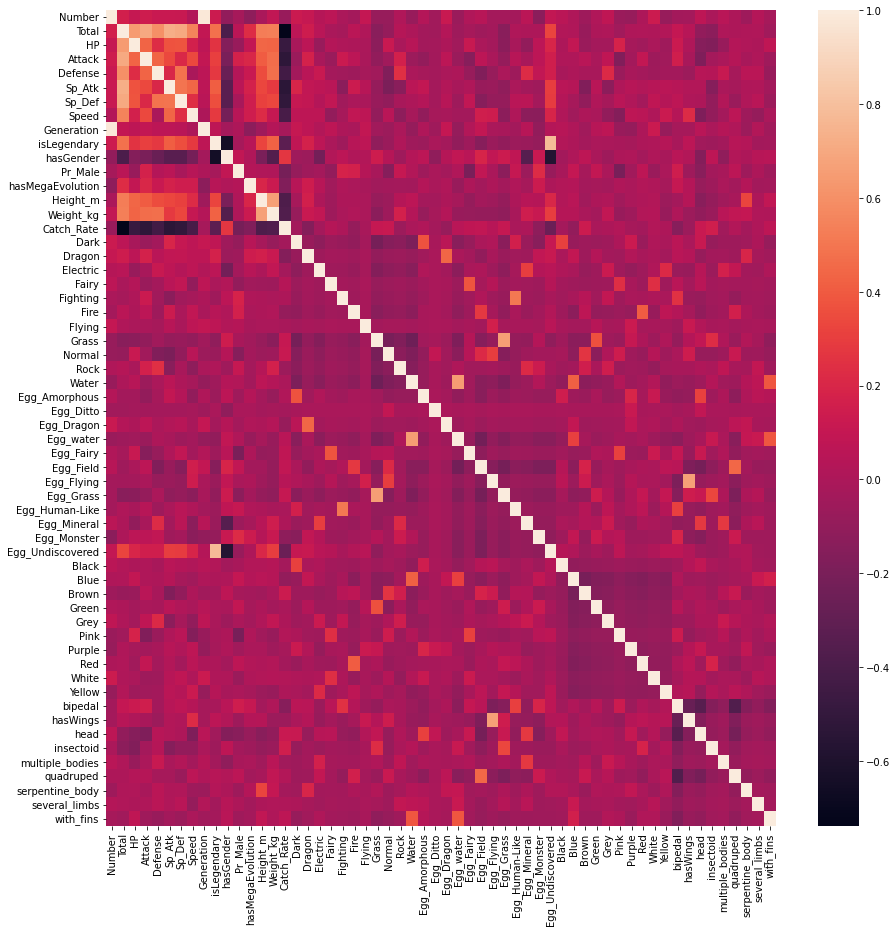

In [ ]:
#Imprimindo a matriz que mostra a correlação entre as features.
plt.figure(figsize=(15,15))
dataplot=sns.heatmap(Poke.corr())

Neste ponto, fica difícil identificar com clareza quais são os dados mais correlacionados com a feature "isLegendary" com apenas a imagem. Então será realizado o mesmo procedimento de extrair somente as features correlacionadas com a feature isLegendary.

In [ ]:
corrfinal= Poke.corr()
corrfinal=(corrfinal[['isLegendary']]).abs().sort_values(by="isLegendary", ascending=False)
corrfinal.head()

,isLegendary
isLegendary,1.000000
Egg_Undiscovered,0.777773
hasGender,0.644714
Total,0.481837
Weight_kg,0.425219


A partir da informação acima, foi possível descobrir uma feature ainda mais importante que "hasGender", "Egg_Undiscovered", o que é esperado, pois não é possível chocar ovos de lendários, com apenas duas exceções. 

___

Separando o "target" das outras features.

In [ ]:
target = Poke['isLegendary'].copy()

#Removendo o Target dos dados.
data = Poke.drop(['isLegendary'], axis=1)

target.head()

0    False
1    False
2    False
3    False
4    False
Name: isLegendary, dtype: bool

# CLASSIFICAÇÃO SEM PCA

In [ ]:
#Dividindo os dados de treino e teste.
Xtrain, Xtest, ytrain, ytest = tts(data, target , test_size=0.35, shuffle=True)

In [ ]:
#Verificando shapes.
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(468, 57)
(468,)
(253, 57)
(253,)


In [ ]:
#Treinando o modelo.
model = dt()
              
model.fit(Xtrain,ytrain)

#Testando o modelo com o conjunto de teste.
y_pred = model.predict(Xtest)

#MÉTRICAS DE AVALIAÇÃO SEM PCA

Aplicando o Cross Validation para estimar a acurácia e precisão do modelo.


In [ ]:
#Extraindo a Precisão média a partir de validação cruzada.
scores_prc = cross_val_score(model,data,target, cv=5, scoring='precision')
#Extraindo a Acurácia média a partir de validação cruzada.
scores_acc = cross_val_score(model,data,target, cv=5, scoring='accuracy')

In [ ]:
print("Precisões medidas:", scores_prc)
print("Acurácias medidas:", scores_acc)

Precisões medidas: [1.         0.8        0.72727273 0.8        0.6       ]
Acurácias medidas: [0.99310345 0.97916667 0.97916667 0.98611111 0.94444444]


In [ ]:
scores_acc = scores_acc.mean()
scores_prc = scores_prc.mean()

print('Precisão média: {:2.2%}'.format(scores_prc ))
print('Acurácia média: {:2.2%}'.format(scores_acc ))

Precisão média: 78.55%
Acurácia média: 97.64%


Score do modelo: 98.02%


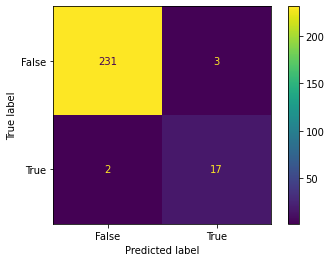

In [ ]:
#Visualização da matriz de confusão.
ConfusionMatrixDisplay.from_estimator(model, Xtest,ytest)

#Dados explicados.
print('Score do modelo: {:2.2%}'.format(model.score(Xtest,ytest)))

In [ ]:
#Métricas em geral.
print(classification_report(ytest, y_pred, target_names=['Not_Legendary','Legendary']))

               precision    recall  f1-score   support

Not_Legendary       0.99      0.99      0.99       234
    Legendary       0.85      0.89      0.87        19

     accuracy                           0.98       253
    macro avg       0.92      0.94      0.93       253
 weighted avg       0.98      0.98      0.98       253



<Figure size 2160x2160 with 0 Axes>

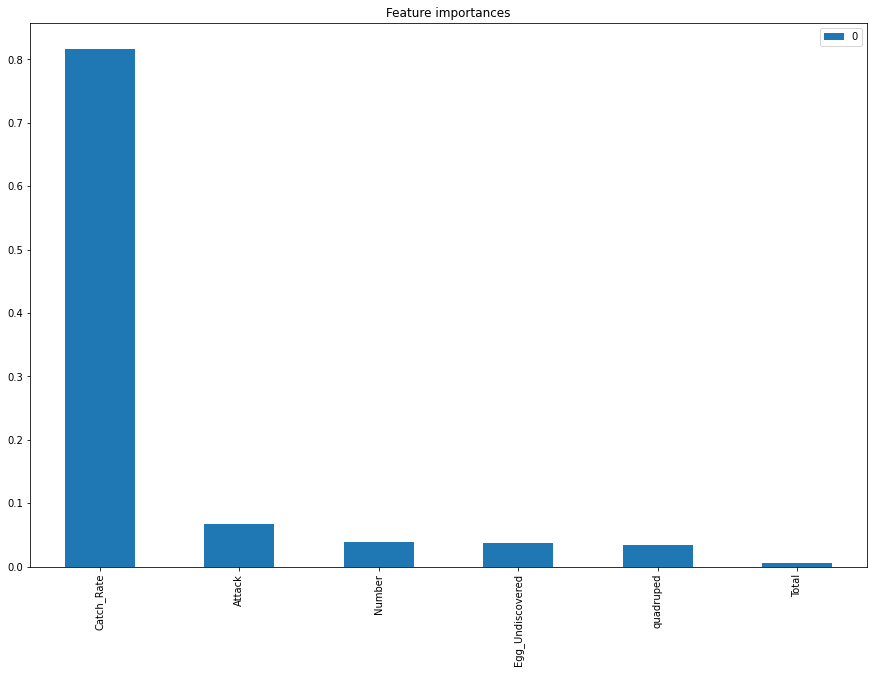

,0
Catch_Rate,0.816468
Attack,0.067487
Number,0.039037
Egg_Undiscovered,0.037793
quadruped,0.033690


In [ ]:
#Extraindo a importância relativa das features.
model.feature_importances_
feature_importance= pd.DataFrame(model.feature_importances_, index = data.columns).sort_values(by=0, ascending=False)

#Plot do gráfico de barras com a importância relativa de cada feature.
features= list(feature_importance[feature_importance[0]>0].index)
plt.figure(figsize=(30,30))
feature_importance.head(6).plot(figsize=(15,10),kind='bar')

plt.title("Feature importances")

plt.show()

feature_importance.head()

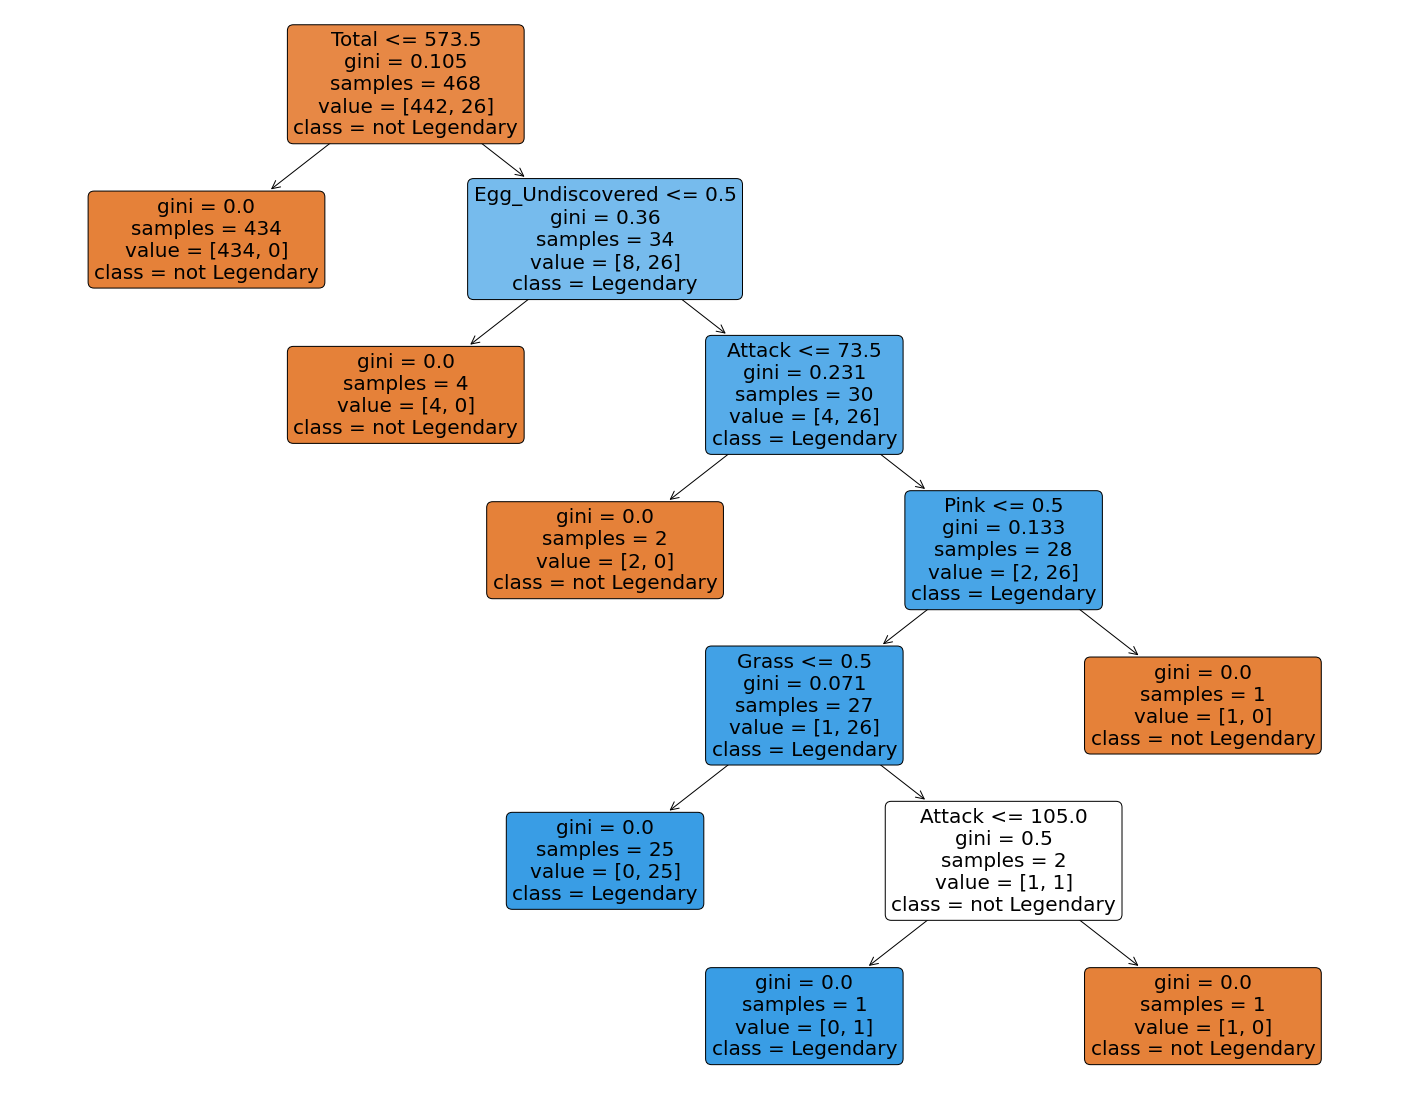

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=data.columns,
                   class_names = {0: 'not Legendary', 1:'Legendary'},
                   filled=True,
                   fontsize=20,
                   rounded=True
                   )

#EXIBIÇÃO DOS ERROS INDIVIDUAIS DO CLASSIFICADOR SEM PCA

Transformando a saída predita e esperada em um único dataframe que possua apenas os pokémons classificados erroneamente pelo classificador. 

In [ ]:
y_df = pd.DataFrame(data = y_pred, columns = ['isLegendary'], index = Xtest.index.copy())

df_out = pd.merge(Poke, y_df, how = 'left', left_index = True, right_index = True)

df_out = pd.merge(Poke_names, df_out, how = 'left', left_index = True, right_index = True)

df_out = df_out.dropna(axis=0)
df_out = df_out.where (df_out['isLegendary_x'] != df_out['isLegendary_y']).dropna(axis=0)
df_out['Number'] = df_out['Number'].astype(int)

Exibindo apenas os pokémons cuja saída predita foi diferente da esperada, ou seja, os erros do classificador.

In [ ]:
#Tornando os dados mais intuitivos para entendimento.

df_out = df_out.rename(columns={'isLegendary_x': 'Saída_Esperada', 'isLegendary_y': 'Saída_Predita', 'Number': 'Número'})
display(df_out[["Name","Saída_Esperada","Saída_Predita","Número"]])


,Name,Saída_Esperada,Saída_Predita,Numero
250,Celebi,False,True,251
377,Regice,True,False,378
480,Mesprit,True,False,481
647,Meloetta,False,True,648
718,Diancie,True,False,719


# CLASSIFICAÇÃO COM PCA



Verificando o desbalanceio de dados, que é esperado, já que os pokémons lendários são raros.

In [ ]:
print(data.shape)
print(target.shape)

#Criadas novas variáveis para data e target, para que não haja confusão com o código acima.
data1 = data
target1 = target

print("Análise da distribuição das classes")

np.unique(target1,return_counts=True)

(721, 57)
(721,)
Análise da distribuição das classes


(array([False,  True]), array([675,  46]))

Para que seja possível utilizar o PCA, é necessário que os dados estejam numa mesma escala, por isso estes serão tratados utilizando a ferramenta StandardScaler, uma etapa que normalmente estaria associada ao pré-processamento.

Aplicando o PCA e StandardScaler.

In [ ]:
#Utilizando o StandardScaler para fazer com que os dados numéricos fiquem na mesma escala.
scale_obj = StandardScaler()
data1 = scale_obj.fit_transform(data1.astype(float))

#Separando os dados com 35% sendo para teste.
Xtrain, Xtest, ytrain, ytest = tts(data1,target1, test_size= 0.35, shuffle=True)

#Aplicando o PCA para 10 componentes.
from sklearn import decomposition  
pca = decomposition.PCA(n_components=10)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest) 

Treinando o modelo.

In [ ]:
#Criando o modelo.
model1 = dt()  

#Treinando o modelo.
model1.fit(Xtrain,ytrain)

#Testando o modelo com o conjunto de teste.
y_pred1 = model1.predict(Xtest)

#MÉTRICAS DE AVALIAÇÃO COM PCA

In [ ]:
#Extraindo a Precisão média a partir de validação cruzada.
scores_prc = cross_val_score(model1,data1,target1, cv=5, scoring='precision')

#Extraindo a Acurácia média a partir de validação cruzada.
scores_acc = cross_val_score(model1,data1,target1, cv=5, scoring='accuracy')

In [ ]:
print("Precisões medidas:", scores_prc)
print("Acurácias medidas:", scores_acc)

Precisões medidas: [1.         0.8        0.8        0.8        0.63636364]
Acurácias medidas: [1.         0.97916667 0.97916667 0.98611111 0.97222222]


In [ ]:
scores_acc = scores_acc.mean()
scores_prc = scores_prc.mean()

print('Precisão média: {:2.2%}'.format(scores_prc ))
print('Acurácia média: {:2.2%}'.format(scores_acc ))

Precisão média: 80.73%
Acurácia média: 98.33%


Score do modelo: 97.23%


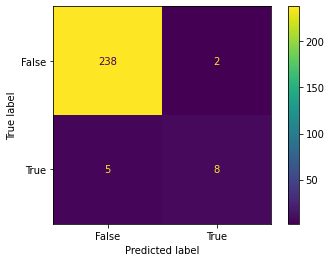

In [ ]:
#Visualização da matriz de confusão.
ConfusionMatrixDisplay.from_estimator(model1, Xtest,ytest)

#Dados explicados.
print('Score do modelo: {:2.2%}'.format(model1.score(Xtest,ytest)))

In [ ]:
#Métricas em geral.
print(classification_report(ytest, y_pred, target_names=['Not_Legendary','Legendary']))

               precision    recall  f1-score   support

Not_Legendary       0.95      0.96      0.95       240
    Legendary       0.09      0.08      0.08        13

     accuracy                           0.91       253
    macro avg       0.52      0.52      0.52       253
 weighted avg       0.91      0.91      0.91       253



#Visualização PCA

Com o PCA, pode-se adquirir uma métrica de quão bem os dados são explicados nas novas dimensões, nesse caso foram utilizados 2 para que seja possível visualizar como seria a separação graficamente.

In [ ]:
from sklearn.decomposition import PCA
pca_viewer = PCA(n_components=2)
principal_components = pca_viewer.fit_transform(Xtrain)

#Calculo de quanto o PCA explica dos dados pré redução.
print("Porcentagem de variancia explicada por cada componente")
print(pca_viewer.explained_variance_ratio_)

data_explained = sum(pca_viewer.explained_variance_ratio_)
print('Dados explicados pelo PCA: {:2.2%}'.format(data_explained))

Porcentagem de variancia explicada por cada componente
[0.21413667 0.11294697]
Dados explicados pelo PCA: 32.71%


Transformando as componentes principais do PCA de duas dimensões em um dataframe para que seja possíveç plotar em um gráfico 2D (para visualizar como é a separação dos dados em 2D).

In [ ]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['principal component 1', 'principal component 2'])
principal_components_df.head()

,principal component 1,principal component 2
0,-0.098302,0.911489
1,0.588902,-0.014829
2,-3.111887,1.132443
3,0.924601,1.787012
4,0.028792,1.467451


In [ ]:
#Troca de nomes para tornar o entendimento do gráfico abaixo mais intuitivo.
ytrain.astype(int)
ytrain = np.where (ytrain == True, 'Legendary', ytrain)
ytrain = np.where(ytrain == 'False', 'not_Legendary', ytrain)


Plot do gráfico de PCA com duas dimensões.

<Figure size 432x288 with 0 Axes>

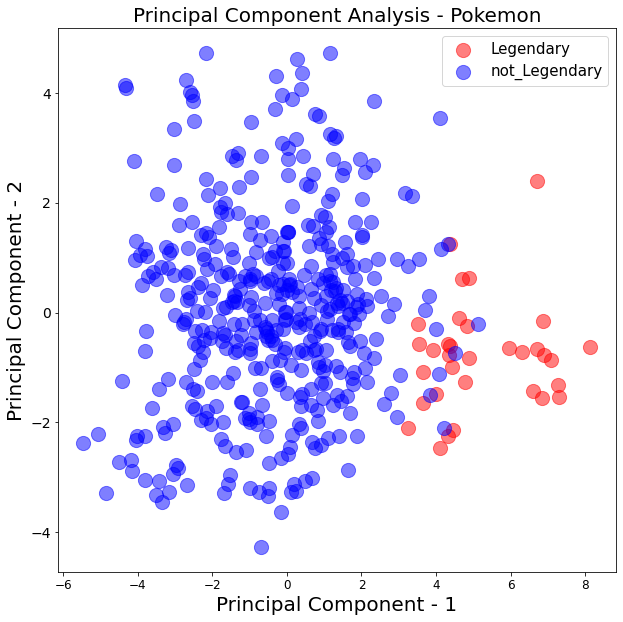

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)

plt.title("Principal Component Analysis - Pokemon",fontsize=20)
targets = ['Legendary', 'not_Legendary']
colors = ['r', 'b']

for target1, color in zip(targets,colors):
    indicesToKeep = ytrain == target1
    plt.scatter(principal_components_df.loc[indicesToKeep, 'principal component 1'], 
                principal_components_df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 200, alpha=0.5)

plt.legend(targets,prop={'size': 15})
plt.show()

Como é possível verificar acima, os dados têm uma certa separação visível, porém é esperado que hajam confusões por parte do algoritmo ao classificar utilizando apenas duas dimensões, já há uma mistura dos dados em algumas áreas.

# REFERÊNCIAS

BulbaPedia:

https://bulbapedia.bulbagarden.net/wiki/Main_Page


ScikitLearn:

https://scikit-learn.org/stable/modules/tree.html?highlight=decision_tree



Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python:

https://mljar.com/blog/visualize-decision-tree/#:~:text=A%20Decision%20Tree%20is%20a,starting%20at%20the%20root%20node.



How to Implement K fold Cross-Validation in Scikit-Learn:

https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/



Principal Component Analysis for Visualization:

https://machinelearningmastery.com/principal-component-analysis-for-visualization/



Decision Trees, PCA, and data compression: 

https://www.kaggle.com/code/lucabasa/decision-trees-pca-and-data-compression

Pokemon:

https://www.kaggle.com/datasets/mlomuscio/pokemon

Aglomerado de links com diferentes datasets sobre pokémons (com descrição): 

https://swhui.github.io/StatisticsinPokemon/datasets/

Projeto parecido utilizando outro banco de dados:

https://www.kaggle.com/code/mlomuscio/decision-trees-bagging-and-random-forests#Example-3:-Legendary-Pokemon




#***EXTRA***

# TESTE COMPARATIVO COM KNN

In [ ]:
data2 = data
target2 = target

In [ ]:
#Utilizando o StandardScaler para fazer com que os dados numéricos fiquem na mesma escala
"""scale_obj = StandardScaler()
data1 = scale_obj.fit_transform(data1.astype(float))"""

#Separando os dados com 35% sendo para teste
Xtrain, Xtest, ytrain, ytest = tts(data2,target2, test_size= 0.35, shuffle=True)

#Aplicando o PCA para 10 componentes
"""from sklearn import decomposition  
pca = decomposition.PCA(n_components=10)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest) """

'from sklearn import decomposition  \npca = decomposition.PCA(n_components=10)\nXtrain = pca.fit_transform(Xtrain)\nXtest = pca.transform(Xtest) '

Treinando o modelo 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

#Treinando o modelo
model2 = KNN(n_neighbors=1)  

In [ ]:
model2.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#treinando o modelo


#Testando o modelo com o conjunto de teste
y_pred1 = model2.predict(Xtest)

In [ ]:
model2.score(Xtest,ytest)

0.9881422924901185